In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [47]:
circuit_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\circuits.csv')
constructor_result_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\constructor_results.csv')
constructors_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\constructors.csv')
constructor_standing_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\constructor_standings.csv')
driver_standing_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\driver_standings.csv')
drivers_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\drivers.csv')
lap_time_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\lap_times.csv')
pit_stops_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\pit_stops.csv')
qualifying_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\qualifying.csv')
race_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\races.csv')
results_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\results.csv')
status_df=pd.read_csv(r'C:\Users\prave\Downloads\f1db_csv\status.csv')

<div style="background-color:red; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Races</h2>
</div>

Let us start by looking at the Formula 1 races so far. For this, we will load the `races.csv` file as a data frame.

---

In [11]:
race_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


The beginning few rows are from the 2009 season. Thus, the data is not in chronological order. Since the date column has type date (see schema), we can sort it as follows.

In [14]:
race_df = race_df.sort_values('date')
race_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
832,833,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
833,834,1950,2,6,Monaco Grand Prix,1950-05-21,\N,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
834,835,1950,3,19,Indianapolis 500,1950-05-30,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,\N,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,\N,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


The file gives data for all the races held so far, but also has info on upcoming races scheduled for this year's championship. Let's remove those rows as these races are yet to happen. The last completed race is the Russian GP held on 27th September 2020. We will delete the future races using the date column again.

In [15]:
race_df = race_df[race_df.date <= '2020-09-27']

<div style="background-color:lightgreen; padding:10px; border-radius:3px;">
    <h2 style="color:black; font-weight:bold; text-align:left-corner;">Question: How many chequered flags have been waved in Formula 1 so far?</h2>
</div>

Let's see how many F1 championship races have been completed until the Russian GP.

---

In [16]:
races_completed = len(race_df)
print('The number of chequered flags waved in F1 so far (until 2020 Russian GP) is {}.'.format(races_completed))

The number of chequered flags waved in F1 so far (until 2020 Russian GP) is 1028.


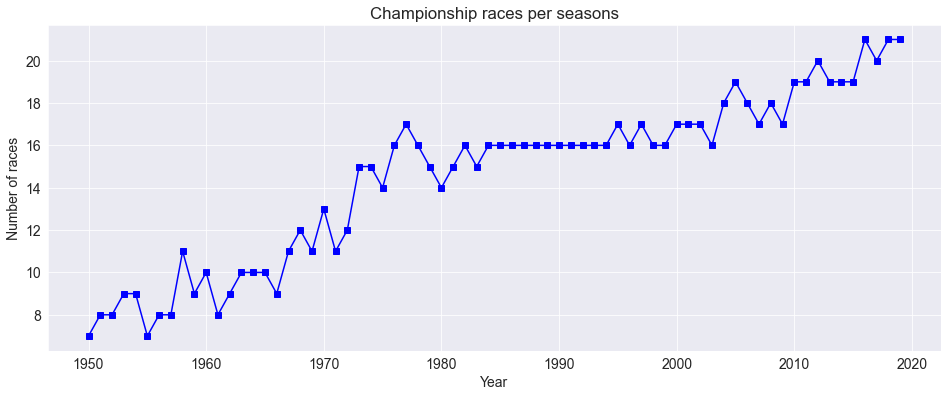

In [18]:
# Now, let us visualize the trend in the number of champions races held per season calendar over the 70 years.

idx = race_df.groupby(['year'])['date'].transform(max) == race_df['date'] # Finds if the race index is last of the season
season_finale = race_df[idx].rename(columns = {'round' : 'tot_races'}) 
season_finale = season_finale[season_finale.year != 2020] # A new data frame with season-ending races only, excluding the 2020 season

# Plotting
plt.figure(figsize=(16, 6))

plt.plot(season_finale.year, season_finale.tot_races, 's-b')
plt.xlabel('Year')
plt.ylabel('Number of races')
plt.title("Championship races per seasons")
plt.show()

There were only seven races for the initial 1950 Formula1 season. Compare that to 21 championship races last year! Although most races happen in Europe, Formula 1 races in all other continents except Africa and Antarctica.  Travelling is a heavy burden on both the drivers and the teams. Need not mention the amount of cargo they transport all around the world.

<div style="background-color:red; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Circuits</h2>
</div>

Let us look at the circuits around the world that have hosted Formula 1 races. For this, we will load the `circuits.csv` file as a data frame.

---

In [19]:
circuit_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


If you look at the data, you can find names of some circuits that haven't hosted any races yet. For example, Hanoi in Vietnam was supposed to hold a race in the year 2020. But due to the pandemic, like many other races, it had to be cancelled. To find the actual number of tracks to have hosted an F1 race, we will merge the above data frame with the one containing data of all the races.

In [20]:
host_circuits =  race_df.drop(['date', 'time', 'url', 'round'], axis = 1).rename(columns = {'name':'gp_name'}).merge(
    circuit_df.drop(['lat', 'lng', 'alt', 'url'], 1).rename(columns = {'name':'cir_name'}), how = 'left')


<div style="background-color:lightgreen; padding:10px; border-radius:3px;">
    <h2 style="color:black; font-weight:bold; text-align:left-corner;"> Question: How many circuits have hosted a Formula 1 race on their tarmac?</h2>
</div>

In [21]:
tot_host_cir = host_circuits['circuitId'].nunique()
print('{} different circuits around the world have hosted a Formula 1 race on their tarmac.'.format(tot_host_cir))

72 different circuits around the world have hosted a Formula 1 race on their tarmac.


So far 73 circuits have played venues for F1 races. Autodromo Internazionale del Mugello is the latest addition to this list after it hosted the penultimate Grand Prix so far, the 2020 Tuscan GP. We will now look at the top 10 circuits to have hosted the most number of GPs.

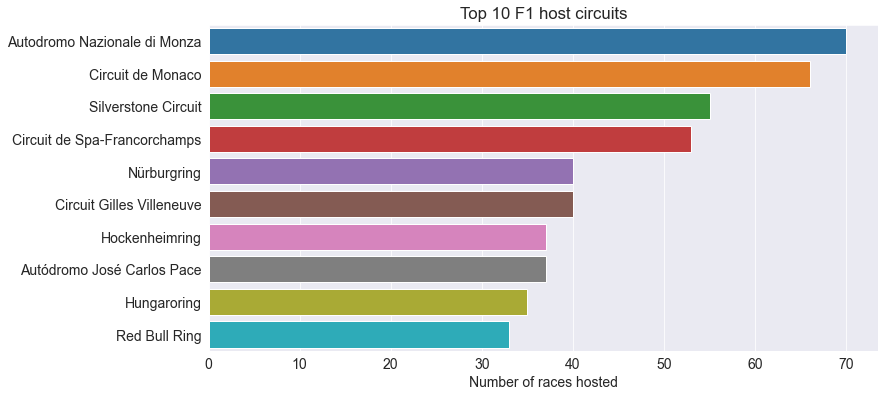

In [22]:
# Sorting top 10 after taking count of occurrences
top_hosts = host_circuits[['cir_name']].cir_name.value_counts().reset_index().rename(
           columns={'index': 'name', 'cir_name': 'counts'}).head(10)

# Plotting
plt.figure(figsize = (12,6))

sns.barplot(top_hosts.counts, top_hosts.name)
plt.title('Top 10 F1 host circuits')
plt.xlabel('Number of races hosted')
plt.ylabel('');

With 70 races, Monza has hosted more GPs than any other circuit. This high-speed Italian racetrack has been a part of every Formula1 season, except 1980. In the second spot, we have the legendary Circuit de Monaco laid out on the streets of Monte Carlo. Apart from racing, it is famous for glitz and glamour. Silverstone and Spa are other iconic circuits that can boast more than 50 races. All these historic tacks still feature in modern F1 calendars.

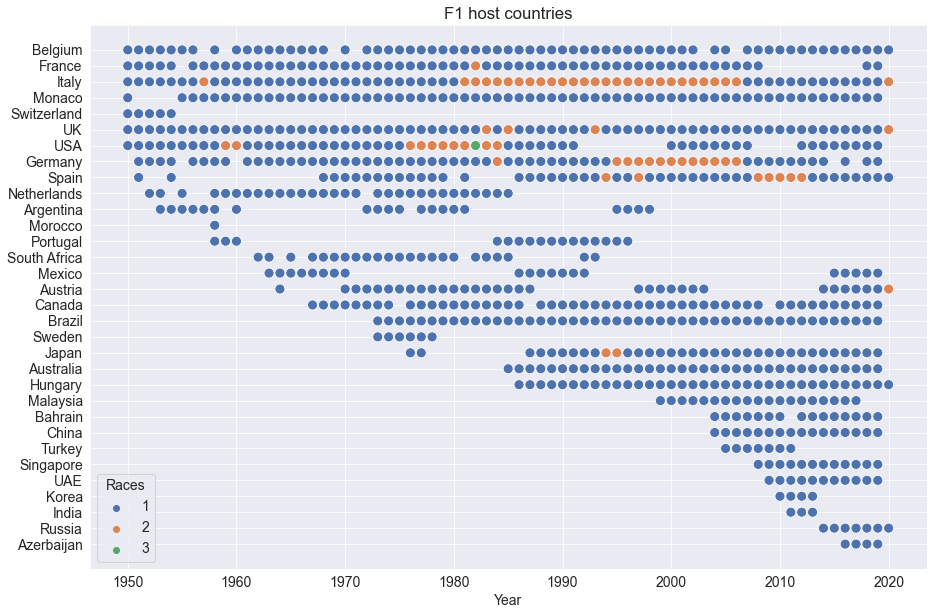

In [23]:
# We can now look at the countries to have hosted Formula 1 over the years.

host_countries = host_circuits[['raceId', 'year', 'country']].groupby(
    ['year','country']).size().reset_index().rename(columns = {0:'Races'})

# Plotting
plt.figure(figsize = (15,10))

sns.scatterplot(data = host_countries, x = 'year', y = 'country', s = 100, hue = 'Races', palette="deep")
plt.title('F1 host countries')
plt.xlabel('Year')
plt.ylabel('');

Formula 1 has deep roots in the European soil, and it shows. All the countries to have consistently hosted F1 races are from Europe. Italy and the UK have been part of every Formula 1 season yet. Other top host nations are Belgium and Germany. The USA is the country outside the European continent with most races. F1 has looked for newer grounds ever since its inception. From the 1970s and 1980s, countries like Canada, Brazil, Japan, Australia and Hungary are frequently visited. Some of the regular modern F1 circuits are in Bahrain, China, Singapore and UAE. Countries like Italy, Germany and the USA have hosted on multiple circuits in the same calendar year. The United States hosted three Grands Prix in 1982, one each in Long Beach, Detroit and Las Vegas. In 2020, when the organisers had to reschedule the season due to the pandemic, Silverstone in the UK and Red Bull Ring in Austria hosted two races each.

<div style="background-color:green; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Constructors</h2>
</div>

Being a technology-driven sport, constructors have a massive role in F1. A driver can only be as good as the car underneath him. F1 also runs a championship for the constructors along with the drivers' championship. Let's look at all the players that have been in this business.

---

In [25]:
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


There have been 211 official entrants into Formula 1 until 2020. Technically, this list should be considered as entrants/teams and not as constructors (read more [here](https://en.wikipedia.org/wiki/List_of_Formula_One_constructors#Terminology:_constructors_vs._teams)). Teams generally change their entry names for rebranding purposes etc. For example, Torro Rosso was rebranded to AlphaTauri in 2020.

In [26]:
# Let us count the number of race entries for each team. We will have to make use of the `results.csv` file for this.
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [31]:
'''We will take only the relevant columns and merge it with the constructors' data frame 
to create a new one for the specific purpose.'''

const_inter_df1 = results_df.groupby(['constructorId', 'raceId']).size() # Group based on constructors and race

const_inter_df2 = const_inter_df1.groupby('constructorId').count().reset_index().rename(columns = {0:'races_ent'}) # Count number of races entered by constructors

const_races_entered = const_inter_df2.merge(constructors_df, on = 'constructorId')
const_races_entered.head()

,constructorId,races_ent,constructorRef,name,nationality,url
0,1,889,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,70,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,803,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,403,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,268,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


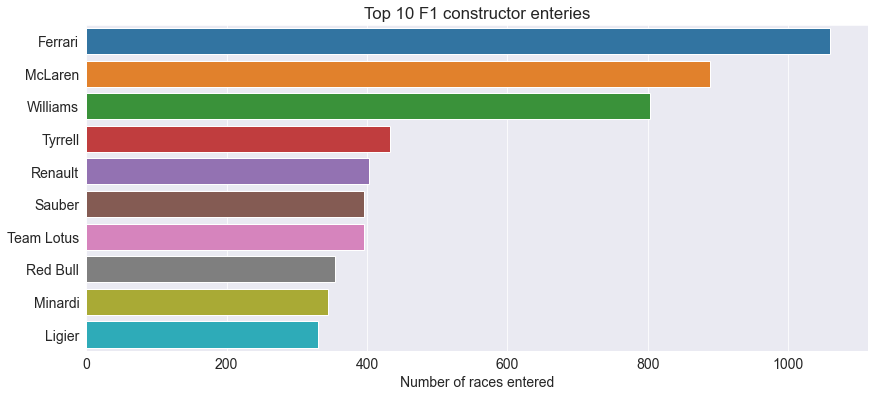

In [32]:
# Let's visualise the top 10 teams to have entered the most number of Grands Prix in Formula 1.

const_races_entered_top = const_races_entered.sort_values('races_ent',ascending = False).head(10)

# Plotting
plt.figure(figsize = (14,6))

sns.barplot(const_races_entered_top.races_ent, const_races_entered_top.name)
plt.title('Top 10 F1 constructor enteries')
plt.xlabel('Number of races entered')
plt.ylabel('')
plt.show()

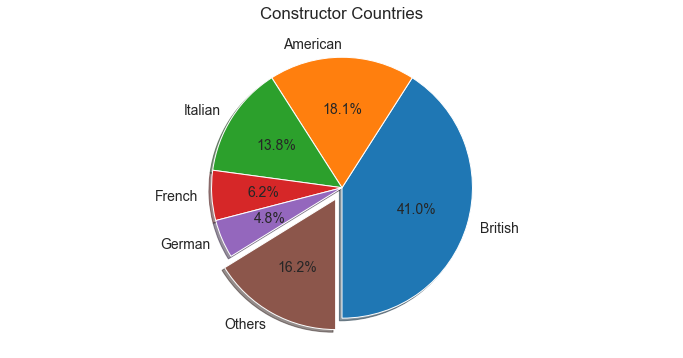

In [33]:
# Let's move on and see where all these teams are/were licensed.

const_country = const_races_entered[['constructorId', 'nationality']].groupby(
    'nationality').count().rename(columns = {'constructorId' : 'counts'}) # Grouping based on nationality

const_country = const_country[const_country.counts >= 10].sort_values('counts', ascending = False)
const_country.loc['Others'] = [(len(const_races_entered) - const_country.counts.sum())] # Consolidating countries with less than 10 teams into 'Others'

# Plotting pie chart
plt.figure(figsize=(12,6))
explode = np.append(np.zeros(5),0.1)  # only "explode" the Others slice
plt.axis('equal')

plt.title('Constructor Countries')
plt.pie(const_country.counts, explode=explode, labels=const_country.index, autopct='%1.1f%%',
        shadow=True, startangle=270)
plt.show()

It is no secret that the British have dominated the sport. Even if licensed in other countries, many teams still are based in Britain. Among the 2020 constructors, only Alfa Romeo, AlphaTauri and Ferrari do not have a factory in the UK. Surprisingly, America holds the second sport. Only one team in the present championship is registered from America (Haas F1 Team). Following them, we have the usual suspects the Italians, the Germans and the French.

<div style="background-color:lightgreen; padding:10px; border-radius:3px;">
    <h2 style="color:black; font-weight:bold; text-align:left-corner;">Question: Licensed in how many different countries have the teams registered in Formula 1?</h2>
</div>

In [34]:
const_country_num = const_races_entered.nationality.nunique()
print('F1 teams have registered with licenses in {} different countries.'.format(const_country_num))

F1 teams have registered with licenses in 24 different countries.


In [38]:
# Next, we will look at the number of race victories for all the constructors.

results_wins = results_df[results_df['position'] == '1'] # taking result rows with wins (position = 1)
results_wins.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
22,23,19,8,6,1,2,1,1,1,10.0,56,1:31:18.555,5478555,37,2,1:35.405,209.158,1
44,45,20,13,6,2,2,1,1,1,10.0,57,1:31:06.970,5466970,38,3,1:33.600,208.153,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
88,89,22,13,6,2,1,1,1,1,10.0,58,1:26:49.451,5209451,16,3,1:26.666,221.734,1


It looks like there are more race winners than the number of races (1028)! Let's see which `raceId` has duplicates in the data.

In [39]:
results_wins[results_wins.duplicated(subset=['raceId'])]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
20185,20186,828,579,51,8,7,1,1,1,5.0,77,3:22:11.0,12131000,\N,\N,\N,\N,1
20266,20267,784,579,6,34,3,1,1,1,5.0,98,3:00:03.7,10803700,\N,\N,\N,\N,1
20288,20291,780,475,118,20,3,1,1,1,5.0,90,3:06:37.8,11197800,\N,\N,\N,\N,1


These races (1951 French GP, 1956 Argentine GP and 1957 British GP) had multiple drivers credited as winners while driving the same car (This kind of driver swapping is not possible in modern F1 races!). However, since the car was the same, there was only one winning constructor. Since our interest at the moment is only on constructor victories, we can drop these duplicates to form a new data frame.

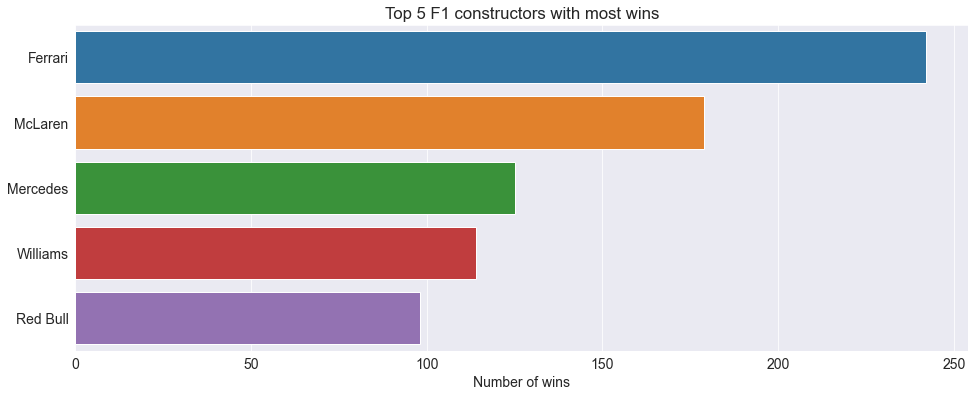

In [41]:
const_wins = results_wins.drop_duplicates(subset = ['raceId']) # Dropping duplicates

const_win_counts = const_wins[['constructorId', 'raceId']].groupby(
    'constructorId').count().reset_index().rename(columns = {'raceId':'wins'})

const_win_counts = const_win_counts.merge(constructors_df, on = 'constructorId').sort_values('wins', ascending = False)

# Plotting
plt.figure(figsize = (16,6))

sns.barplot(const_win_counts.head(5).wins, const_win_counts.head(5).name)
plt.title('Top 5 F1 constructors with most wins')
plt.xlabel('Number of wins')
plt.ylabel('');

Ferrari has 238 race victories in their hands from their 1001 race starts, 60 more than McLaren and much ahead of others. It has to be noted that both Mercedes (as a works team) and Red Bull do not have the F1 pedigree like the other three (the Mercs raced between 1954 and 1955, though). Yet they share the top 5 spots! To get a different perspective, we can look at the data in terms of win percentage per races entered.

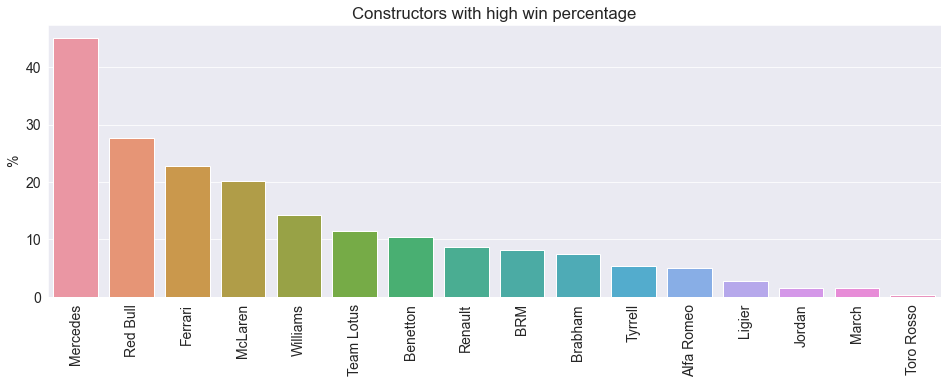

In [42]:
const_win_percent = const_win_counts[['constructorId', 'wins']].merge(
    const_races_entered[['races_ent', 'constructorId', 'name']], on = 'constructorId')

const_win_percent['win_percent'] = const_win_percent['wins'] * 100 / const_win_percent['races_ent'] # Adding the percentage win column

const_win_percent = const_win_percent[const_win_percent['races_ent'] > 100].sort_values(
    'win_percent', ascending = False) # Dropping constructors with less than 100 race entries

# Plotting
plt.figure(figsize=(16,5))
sns.barplot(const_win_percent.name, const_win_percent.win_percent)
plt.xticks(rotation=90)
plt.title('Constructors with high win percentage')
plt.xlabel('')
plt.ylabel('%');

Mercedes win rate is more than double that of its nearest rival, Ferrari. They have won about half of all the races they have participated in F1! Such has been their dominance in the new turbo hybrid era. Ferrari has about 25% success rate in converting race entries to victories, while its little above 20% for McLaren and Red Bull. Note that, only teams with more than 100 race starts are considered here for this analysis for a fair comparison.

We will not look at the constructor championship titles. For this, we have to load the `constructor_standings.csv` file to a data frame, merge it with the `season_finale`, and then sort and group.

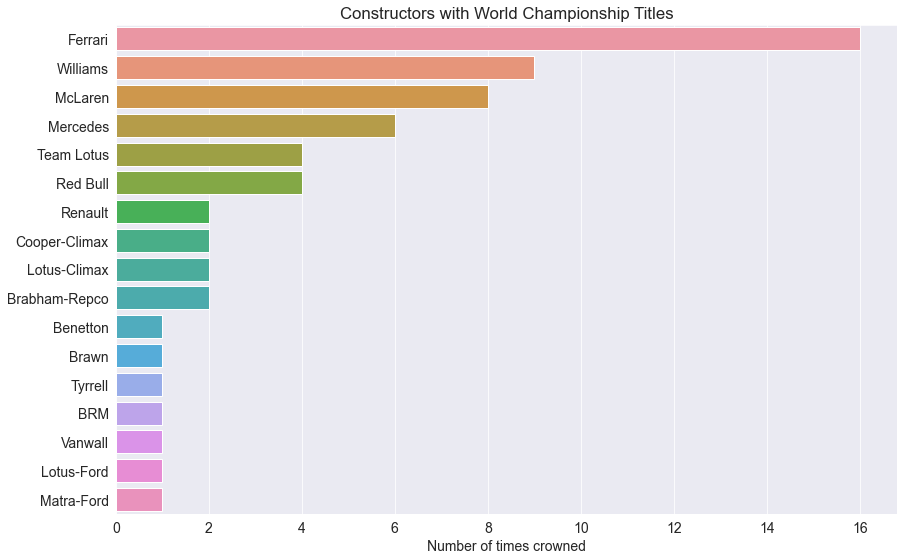

In [50]:
const_st_season_end = season_finale[['raceId', 'year', 'tot_races']].merge(constructor_standing_df, on = 'raceId') # Constructors' standings at season end
const_champ = const_st_season_end[const_st_season_end['position'] == 1] # Sort only the champions in each year
const_champ_tot = const_champ[['constructorId', 'position']].groupby('constructorId').sum().reset_index().merge(
    constructors_df[['name', 'constructorId']]).rename(columns={'position':'titles'}).sort_values('titles', ascending = False) # Total titles per constructor

# Plotting
plt.figure(figsize = (14,9))

sns.barplot(const_champ_tot.titles, const_champ_tot.name)
plt.title('Constructors with World Championship Titles')
plt.xlabel('Number of times crowned')
plt.ylabel('')
plt.show()

Ferrari has an outstanding 16 world titles on their name. Interestingly they claimed 8 of these between 1999 and 2008! Although McLaren has more race victories, Williams has one world title more compared to them. Mercedes has been crowned world champions consequently from the 2014 season, to pack a total of 6 titles. Lotus and Red Bull are other significant teams in the list, winning four championships each. Brawn GP finished the only season they competed (2009) as champions, before being bought and renamed by Mercedes.

<div style="background-color:red; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Drivers</h2>
</div>

Drivers are the superstars of F1. They are the athletes who ultimately battle it out on the tarmac. The competition is always intense and sometimes has become fierce to produce great rivalries. Let us explore some driver stats by loading the `drivers.csv` file.

---

In [52]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


#### Question: Find the number of countries from which there has been a driver representation in Formula 1.

In [53]:
print('There has been representation from {} nationalities in Formula1.'.format(drivers_df.nationality.nunique()))

There has been representation from 42 nationalities in Formula1.


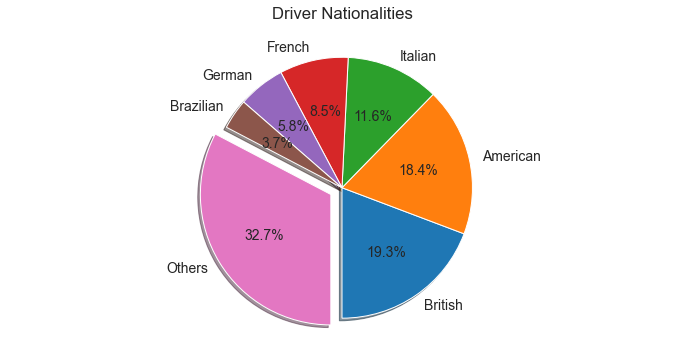

In [55]:
drivers_country = drivers_df[['driverId', 'nationality']].groupby('nationality').count().rename(
    columns = {'driverId' : 'counts'}) # Grouping based on nationality

drivers_country = drivers_country[drivers_country.counts > 30].sort_values('counts', ascending = False)
drivers_country.loc['Others'] = [(len(drivers_df) - drivers_country.counts.sum())] # Consolidating countries with less than 30 representations into 'Others'

# Plotting pie chart
plt.figure(figsize=(12,6))
explode = np.append(np.zeros(6),0.1)  # only "explode" the Others slice
plt.axis('equal')

plt.title('Driver Nationalities')
plt.pie(drivers_country.counts, explode=explode, labels=drivers_country.index, autopct='%1.1f%%',
        shadow=True, startangle=270)
plt.show()

Similar to constructors, the British has dominated in driver representation in F1. Here too, surprisingly, Americans came second. Not many American drivers are involved in F1 in recent years. Their last representation was in 2015. And again the Italians, the French and the Germans share the other top spots along with the Brazilians. There is a significant share, however, from the other 35 nationalities.

Let's build a new consolidated data frame from the CSV files which will contain all the statistics for the drivers. For fulfilling that, we first have to define a few functions which will count the number of race wins, podiums, fastest laps and pole positions from the `results_raw` data frame.

In [56]:
def podium_counter(pos):
    if pos in ['1', '2', '3']:
        return True
    else:
        return False

def win_counter(pos):
    if pos == '1':
        return True
    else:
        return False
    
def pole_counter(grid):
    if grid == 1:
        return True
    else:
        return False

In [57]:
results_copy = results_df[['raceId', 'driverId', 'grid', 'position', 'points', 'laps', 'rank']].copy().rename(
    columns = {'rank':'fastlap'})

# Adding podium, win, pole and fastest lap columns
results_copy['podium'] = results_copy.position.apply(podium_counter)
results_copy['win'] = results_copy.position.apply(win_counter)
results_copy['pole'] = results_copy.grid.apply(pole_counter)
results_copy['fastestLap'] = results_copy.fastlap.apply(win_counter)

# Gouping with respect to drivers applying different rules for different columns
driver_stats_1 = results_copy.drop(columns = ['position', 'grid', 'fastlap']).groupby('driverId')
func_dic = {'raceId':'count', 'points':'sum', 'laps':'sum', 'podium':'sum', 'win':'sum', 'pole':'sum', 'fastestLap':'sum'}
driver_stats_1 = driver_stats_1.aggregate(func_dic).reset_index().rename(columns = {'raceId':'races'})

In [60]:
# Getting driver championship data

driver_st_season_end = season_finale[['raceId', 'year', 'tot_races']].merge(driver_standing_df, on = 'raceId')
driver_champ = driver_st_season_end[driver_st_season_end['position'] == 1]
driver_champ_tot = driver_champ[['driverId', 'position']].groupby('driverId').sum().reset_index().merge(
    drivers_df[['forename', 'surname', 'driverId']]).rename(
    columns={'position':'titles'}).sort_values('titles', ascending = False)

# Merging everthing to a single dataframe

driver_stats = driver_stats_1.merge(driver_champ_tot[['driverId', 'titles']], how = 'left').fillna(0)
driver_stats = drivers_df[['driverId', 'forename', 'surname', 'nationality']].merge(driver_stats, on = 'driverId')
driver_stats

,driverId,forename,surname,nationality,races,points,laps,podium,win,pole,fastestLap,titles
0,1,Lewis,Hamilton,British,316,4463.5,18032,192,103,103,62,6.0
1,2,Nick,Heidfeld,German,184,259.0,9699,13,0,1,2,0.0
2,3,Nico,Rosberg,German,206,1594.5,11159,57,23,30,20,1.0
3,4,Fernando,Alonso,Spanish,364,2151.0,19504,103,32,22,22,2.0
4,5,Heikki,Kovalainen,Finnish,112,105.0,5975,4,1,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
852,854,Mick,Schumacher,German,44,12.0,2277,0,0,0,0,0.0
853,855,Guanyu,Zhou,Chinese,28,8.0,1394,0,0,0,2,0.0
854,856,Nyck,de Vries,Dutch,7,2.0,358,0,0,0,0,0.0
855,857,Oscar,Piastri,Australian,6,5.0,305,0,0,0,0,0.0


In [61]:
# It will be nice to have a function which will take in the driver name as input and display all their stats.

# Funtion to display driver stats
def get_driver_stats():
    try:
        f_n, s_n = input("Enter driver name (as Forename Surname): ").split()
        df = driver_stats.loc[(driver_stats['forename'] == f_n) & (driver_stats['surname'] == s_n)].squeeze()
        return print('''Name: {} {}
Nationality: {}
Stats
Races Entered:\t \t{}
Drivers' Titles:\t{:.0f}
Race Wins:\t \t{}
Pole Positions:\t \t{}
Podiums:\t \t{}
Total Points:\t \t{}
Fastest Laps:\t \t{}
Laps Raced:\t \t{}'''.format(df.forename, df.surname, df.nationality, df.races, df.titles,
          df.win, df.pole, df.podium, df.points, df.fastestLap, df.laps))
    
    except TypeError:
        print('No driver found! Make sure the first letters are capital.')
        
    except ValueError:
        print('Please enter both forename and surname.')

In [62]:
get_driver_stats()

Enter driver name (as Forename Surname): Fernando Alonso
Name: Fernando Alonso
Nationality: Spanish
Stats
Races Entered:	 	364
Drivers' Titles:	2
Race Wins:	 	32
Pole Positions:	 	22
Podiums:	 	103
Total Points:	 	2151.0
Fastest Laps:	 	22
Laps Raced:	 	19504


<div style="background-color:lightgreen; padding:10px; border-radius:3px;">
    <h2 style="color:black; font-weight:bold; text-align:left-corner;">Question: Who is the most experienced driver in terms of races entered?</h2>
</div>

In [63]:
print('The most experienced driver in terms of races entered is {} {} with {} race entries.'.format(
    driver_stats.sort_values('races').tail(1).squeeze().forename, 
    driver_stats.sort_values('races').tail(1).squeeze().surname, 
    driver_stats.sort_values('races').tail(1).squeeze().races))

The most experienced driver in terms of races entered is Fernando Alonso with 364 race entries.


Now, let's pick up five drivers who are considered to be among the greatest of all time and compare their stats. I'm choosing Hamilton, Schumacher, Senna, Prost and Fangio for the list.

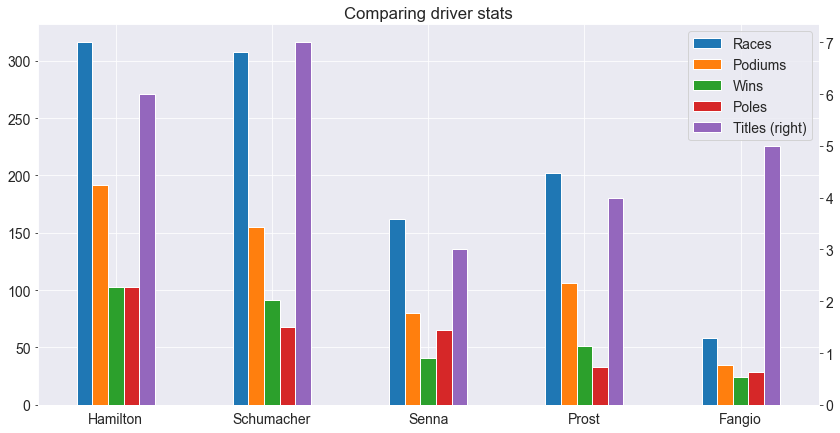

In [64]:
top_drivers = driver_stats[(driver_stats['surname'].isin(['Schumacher', 'Hamilton', 'Prost', 'Senna', 'Fangio']))
            & (driver_stats['forename'].isin(['Michael', 'Lewis', 'Alain', 'Ayrton', 'Juan']))]

top_drivers = top_drivers.drop(['driverId', 'forename', 'nationality', 'points', 'laps', 'fastestLap']
                        , axis = 1).set_index('surname')
top_drivers = top_drivers.rename(columns = 
                                 {'races':'Races', "podium":'Podiums', 'win':'Wins', 'pole':'Poles', 'titles':'Titles'})

# Plotting
sns.set_style('dark')

top_drivers.plot(secondary_y = 'Titles', kind = 'bar', figsize=(14,7), title = 'Comparing driver stats', 
                 xlabel = '', rot = 0, grid = True)
plt.show()